In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['age', 'bmi', 'children', 'charges']

In [10]:
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

['sex', 'smoker', 'region']

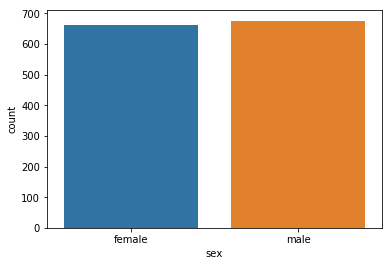

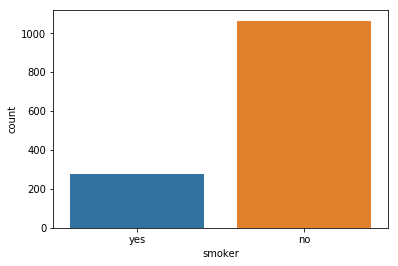

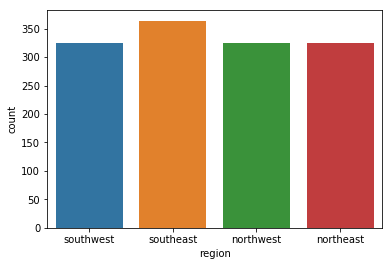

In [11]:
for cat in categorical_feature_columns:
    sns.countplot(cat, data=df)
    plt.show()

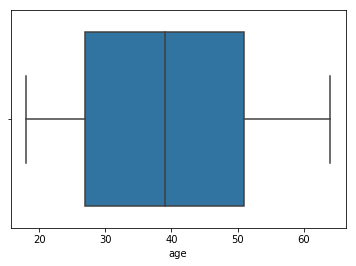

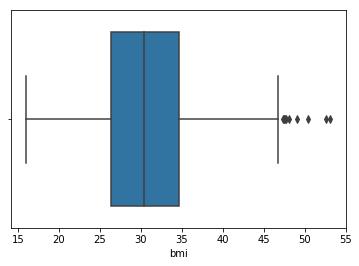

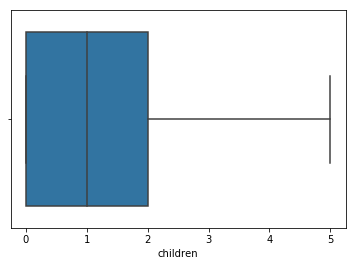

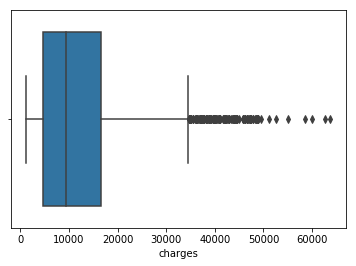

In [12]:
for num_cols in numerical_feature_columns:
    sns.boxplot(x=df[num_cols])
    plt.show()

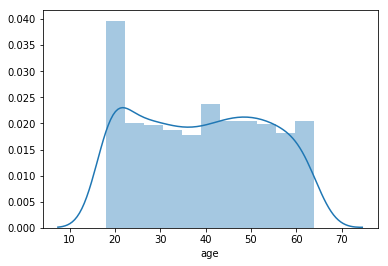

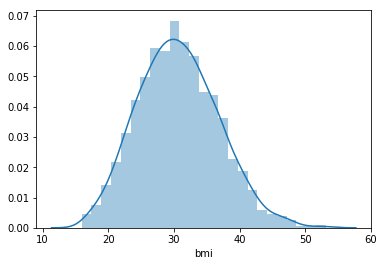

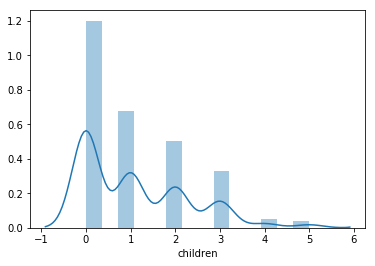

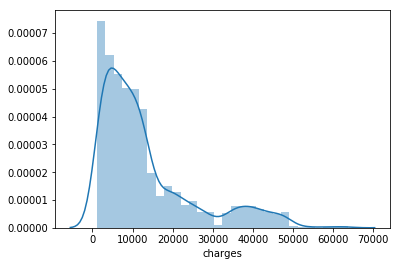

In [13]:
for num_cols in numerical_feature_columns:
    sns.distplot(df[num_cols], kde=True)
    plt.show()

age


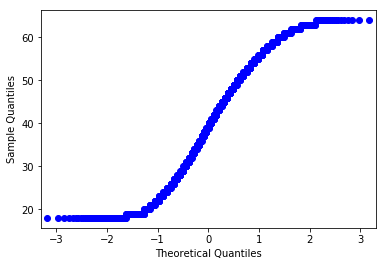

bmi


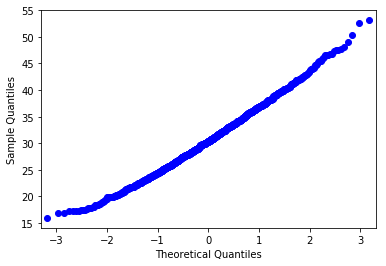

children


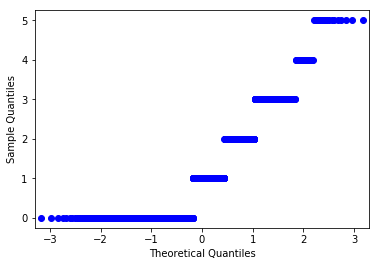

charges


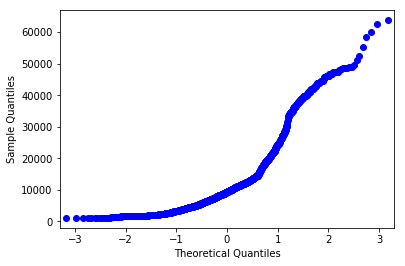

In [14]:
for num_cols in numerical_feature_columns:
    print (num_cols)
    sm.qqplot(df[num_cols])
    plt.show()

In [15]:
numerical_feature_columns

['age', 'bmi', 'children', 'charges']

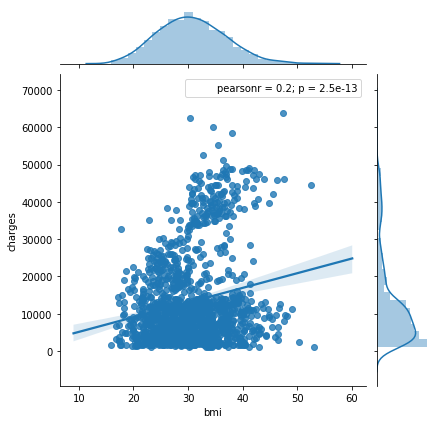

In [16]:
sns.jointplot('bmi', 'charges', data=df, kind='reg').annotate(stats.pearsonr)

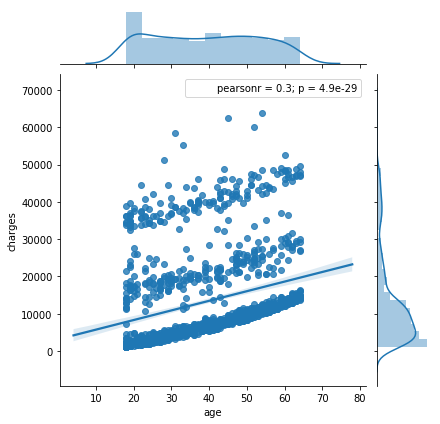

In [17]:
sns.jointplot('age', 'charges', data=df, kind='reg').annotate(stats.pearsonr)

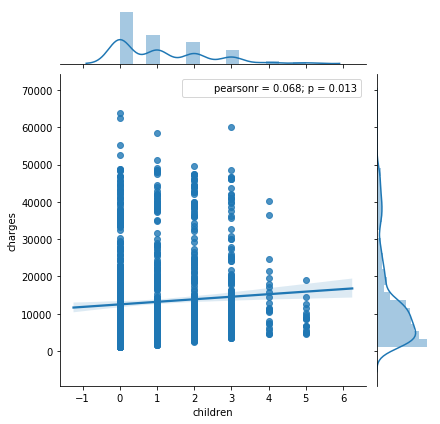

In [18]:
sns.jointplot('children', 'charges', data=df, kind='reg').annotate(stats.pearsonr)

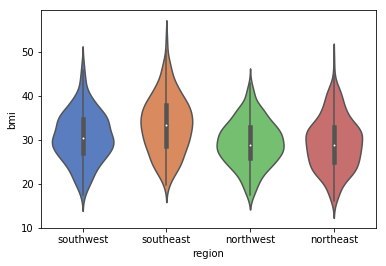

In [19]:
# sns.violinplot(x=df.region, y=df.bmi, hue=df.sex,data=df, palette="muted", split=True)
sns.violinplot(x=df.region, y=df.bmi,data=df, palette="muted", split=True)

In [20]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

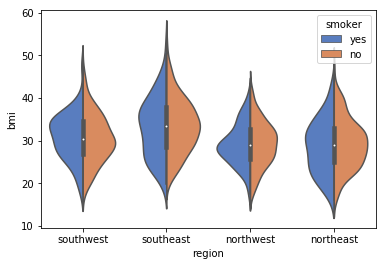

In [21]:
sns.violinplot(x=df.region, y=df.bmi, hue=df.smoker,data=df, palette="muted", split=True)

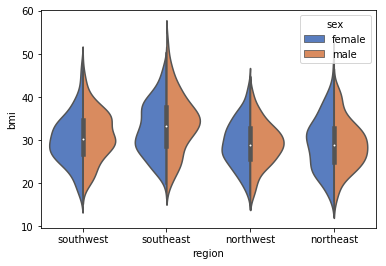

In [22]:
sns.violinplot(x=df.region, y=df.bmi, hue=df.sex,data=df, palette="muted", split=True)

In [23]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
k = 12 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k, 'charges_log')['charges_log'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [24]:
df['bmi_square'] = np.square(df['bmi'])
df['bmi_cube'] = df['bmi'] ** 3
df['bmi_log'] = np.log10(df['bmi'])
df['bmi_square_root'] = np.sqrt(df['bmi'])
df['charges_sqr_root'] = np.sqrt(df.charges)
df['charges_sqr_root_sqr_root'] = np.sqrt(df.charges_sqr_root)
df['charges_log'] = np.log10(df.charges)
n = 1/4
df['charges_4th_root'] = (df.charges)**n

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_square,bmi_cube,bmi_log,bmi_square_root,charges_sqr_root,charges_sqr_root_sqr_root,charges_log,charges_4th_root
0,19,female,27.900,0,yes,southwest,16884.92400,778.410000,21717.639000,1.445604,5.282045,129.942002,11.399211,4.227499,11.399211
1,18,male,33.770,1,no,southeast,1725.55230,1140.412900,38511.743633,1.528531,5.811196,41.539768,6.445135,3.236928,6.445135
2,28,male,33.000,3,no,southeast,4449.46200,1089.000000,35937.000000,1.518514,5.744563,66.704288,8.167269,3.648308,8.167269
3,33,male,22.705,0,no,northwest,21984.47061,515.517025,11704.814053,1.356122,4.764976,148.271611,12.176683,4.342116,12.176683
4,32,male,28.880,0,no,northwest,3866.85520,834.054400,24087.491072,1.460597,5.374012,62.184043,7.885686,3.587358,7.885686


In [26]:
df.charges.skew()

1.5158796580240388

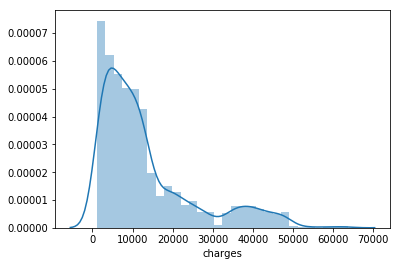

In [27]:
sns.distplot(df.charges, kde=True)

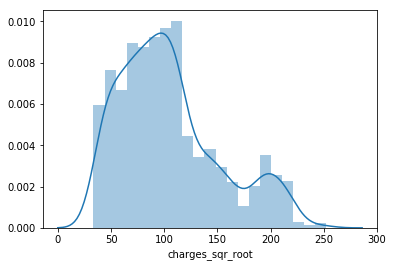

In [28]:
sns.distplot(df.charges_sqr_root, kde=True)

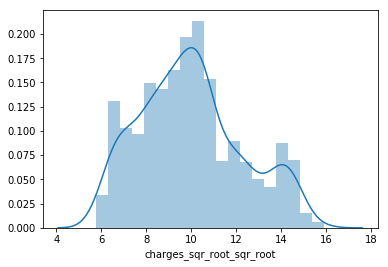

In [29]:
sns.distplot(df.charges_sqr_root_sqr_root, kde=True)

In [30]:
df.charges_sqr_root_sqr_root.skew()

0.36833349075425204

In [31]:
df.charges_log.skew()

-0.09009752473025416

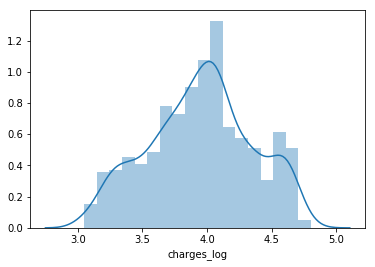

In [32]:
sns.distplot(df.charges_log, kde=True)

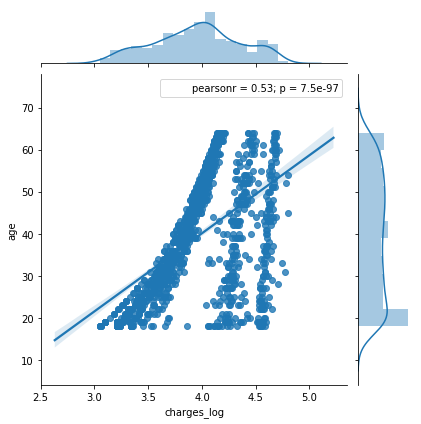

In [33]:
sns.jointplot('charges_log', 'age', data=df, kind='reg').annotate(stats.pearsonr)

In [35]:
df['charges_square'] = np.square(df.charges)

In [36]:
df.charges_square.skew()

2.6033596131520236

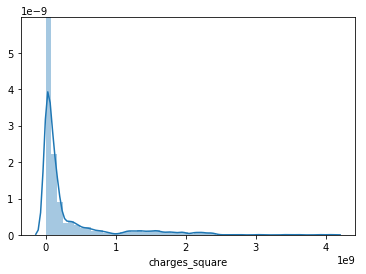

In [37]:
sns.distplot(df.charges_square, kde=True)

In [38]:
df.charges_4th_root.skew()

0.36833349075425204

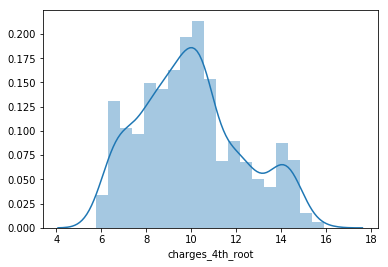

In [39]:
sns.distplot(df.charges_4th_root, kde=True)